In [154]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
from IPython.display import Audio
from scipy import signal
from scipy.signal import butter, filtfilt, lfilter
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import math

In [155]:
samplingFreq = 44100

In [222]:

def sinusoid(seconds : int, freq : int, amp : int, initPhase : float, wave : str) -> list:
    nData = seconds * samplingFreq
    time = np.arange(0, nData).T / samplingFreq # s
    
    # Generate a sinusoid
    sinusoid = amp * np.cos(2 * np.pi * freq * time + initPhase)
    
    if wave == "square":
        #squareWave = np.sign(np.sin(2*np.pi*sinusoid/freq/nData))
        print(max(sinusoid))
        for index, value in enumerate(sinusoid):
            if value >= 0:
                sinusoid[index] = max(sinusoid)
            else:
                sinusoid[index] = -(max(sinusoid))
        return sinusoid
    
    elif wave == "triangle":
        
        return signal.sawtooth(2 * np.pi * freq * time + initPhase)
    
    elif wave == "normal":
        return sinusoid

"""
def wave(data, freq : int, wave : str, time, input_):
    output = np.copy(data)
    if input_ == 2:
        print(max(data))
        #squareWave = np.sign(np.sin(2*np.pi*sinusoid/freq/nData))
        for index, value in enumerate(sinusoid):
            if value >= 0:
                output[index] = 1
            else:
                output[index] = 1
        return sinusoid
    
    elif input_ == 3:
        return np.abs(amp * signal.sawtooth(2 * np.pi * freq * time, width=0.5))
    
    elif wave == 1:
        return data
"""

'\ndef wave(data, freq : int, wave : str, time, input_):\n    output = np.copy(data)\n    if input_ == 2:\n        print(max(data))\n        #squareWave = np.sign(np.sin(2*np.pi*sinusoid/freq/nData))\n        for index, value in enumerate(sinusoid):\n            if value >= 0:\n                output[index] = 1\n            else:\n                output[index] = 1\n        return sinusoid\n    \n    elif input_ == 3:\n        return np.abs(amp * signal.sawtooth(2 * np.pi * freq * time, width=0.5))\n    \n    elif wave == 1:\n        return data\n'

In [224]:
def triangle2(length, amplitude):
    section = length // 4
    x = np.linspace(0, amplitude, section+1)
    mx = -x
    return np.r_[x, x[-2::-1], mx[1:], mx[-2:0:-1]]

[-0.5        -0.49995465 -0.4999093  ... -0.50013605 -0.5000907
 -0.50004535]


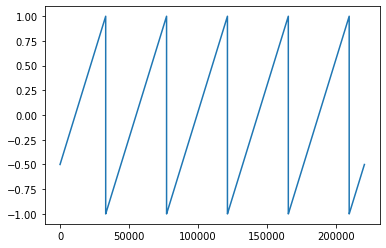

In [223]:
music = sinusoid(seconds = 5, freq = 1, amp = 1, initPhase = np.pi/2, wave = "triangle")
print(music)
plt.plot(music)

In [184]:
Audio(music, rate=samplingFreq)

In [30]:
def filters(audio : list, cutoff : float, type_ : str) -> list:
    output = np.copy(audio)
    if type_ == "lowpass":
        for index, value in enumerate(audio):
            if value > cutoff:
                output[index] = 0
            else:
                pass
    elif type_ == "highpass":
        for index, value in enumerate(audio):
            if value < cutoff:
                output[index] = 0
            else:
                pass
    return output

Audio(music, rate=samplingFreq)

In [31]:
Audio(filters(music, -2, "lowpass"), rate=samplingFreq)

In [227]:
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [228]:
ff = butter_lowpass_filter(music, 3, samplingFreq/2)

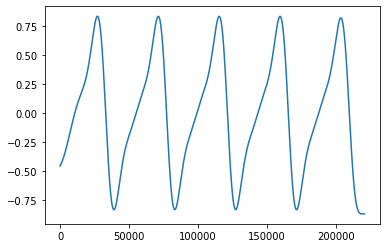

In [229]:
plt.plot(ff)
Audio(ff, rate=samplingFreq)

In [230]:
def filter_(x : list, cut : float, type_ : str) -> list:
    y = [0]*len(x)
    for n in range(4, len(x)):
        y[n] = 0.0101*x[n] - 0.0202*x[n-2] + 0.0101*x[n-4] + 2.4354*y[n-1] - 3.1869*y[n-2] + 2.0889*y[n-3] - 0.7368*y[n-4]
        if type_ == "lowpass":
            if y[n] > cut:
                y[n] = 0
            else:
                pass
        elif type_ == "highpass":
            if y[n] < cut:
                y[n] = 0
            else:
                pass
    return y

In [231]:
aa = filter_(music, 2)

TypeError: filter_() missing 1 required positional argument: 'type_'

In [232]:
Audio(aa, rate=44100)

NameError: name 'aa' is not defined

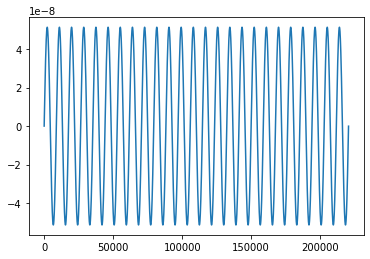

In [245]:
plt.plot(aa)

In [225]:
def butter_bandpass(lowcut, highcut, fs, order = 5):
    nyquist = fs * 0.5
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype = 'band')
    #print("a = {} ... b = {}".format(a, b))
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 5):
    b, a = butter_bandpass(lowcut, highcut, fs, order = order)
    y = lfilter(b, a, data)
    return y


#slider = widgets.IntSlider(min=1, max=1000, value=500)
#slider2 = widgets.IntSlider(min=1, max=1000, value=500)
filtered = butter_bandpass_filter(music, 5, 1000, samplingFreq)
#interact(butter_bandpass_filter, lowcut=slider, highcut=slider2, fs=samplingFreq)

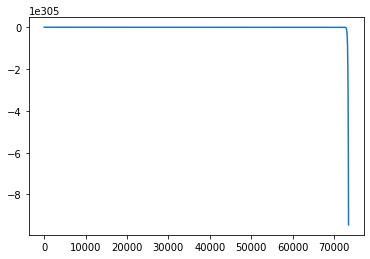

In [226]:
plt.plot(filtered)